# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Muhammad Kaisan Aulia Ridwan
- Email: muhammadkaisan3@gmail.com
- Id Dicoding: A200YBM330

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Menyiapkan data yang akan diguankan

In [3]:
# Load Data
student_df = pd.read_csv("/content/drive/MyDrive/Dataset/datascience2/data.csv", sep=';')

# Tampilkan info awal
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Menggunkan sep, ';'. karena sebelumnya saat tidak memakai semua kolom dianggap string jika tidak ditangani delimiter.

In [4]:
student_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
student_df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
student_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [7]:
# Cek nilai null (bukan NaN string)
student_df.replace("NaN", np.nan, inplace=True)
student_df.replace("nan", np.nan, inplace=True)
student_df.replace("NULL", np.nan, inplace=True)
student_df.replace("null", np.nan, inplace=True)

print("Jumlah missing value per kolom:")
print(student_df.isnull().sum())

Jumlah missing value per kolom:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment 

In [8]:
# Drop missing values
df_cleaned = student_df.dropna()
print("\nBentuk data setelah drop missing values:", df_cleaned.shape)


Bentuk data setelah drop missing values: (4424, 37)


In [9]:
student_df.to_csv("Dataset/data_cleaned.csv", index=False)

OSError: Cannot save file into a non-existent directory: 'Dataset'

Insight :

- Penghapusan nilai yang hilang (missing values) sebenarnya tidak diperlukan karena data set sudah lengkap. Namun, prosedur ini tetap diterapkan demi memenuhi rutinitas dan protokol yang telah ditetapkan

- Target (Status) kemungkinan diklasifikasikan menjadi Dropout, Enrolled, dan Graduate.

### EDA

<Figure size 1400x800 with 0 Axes>

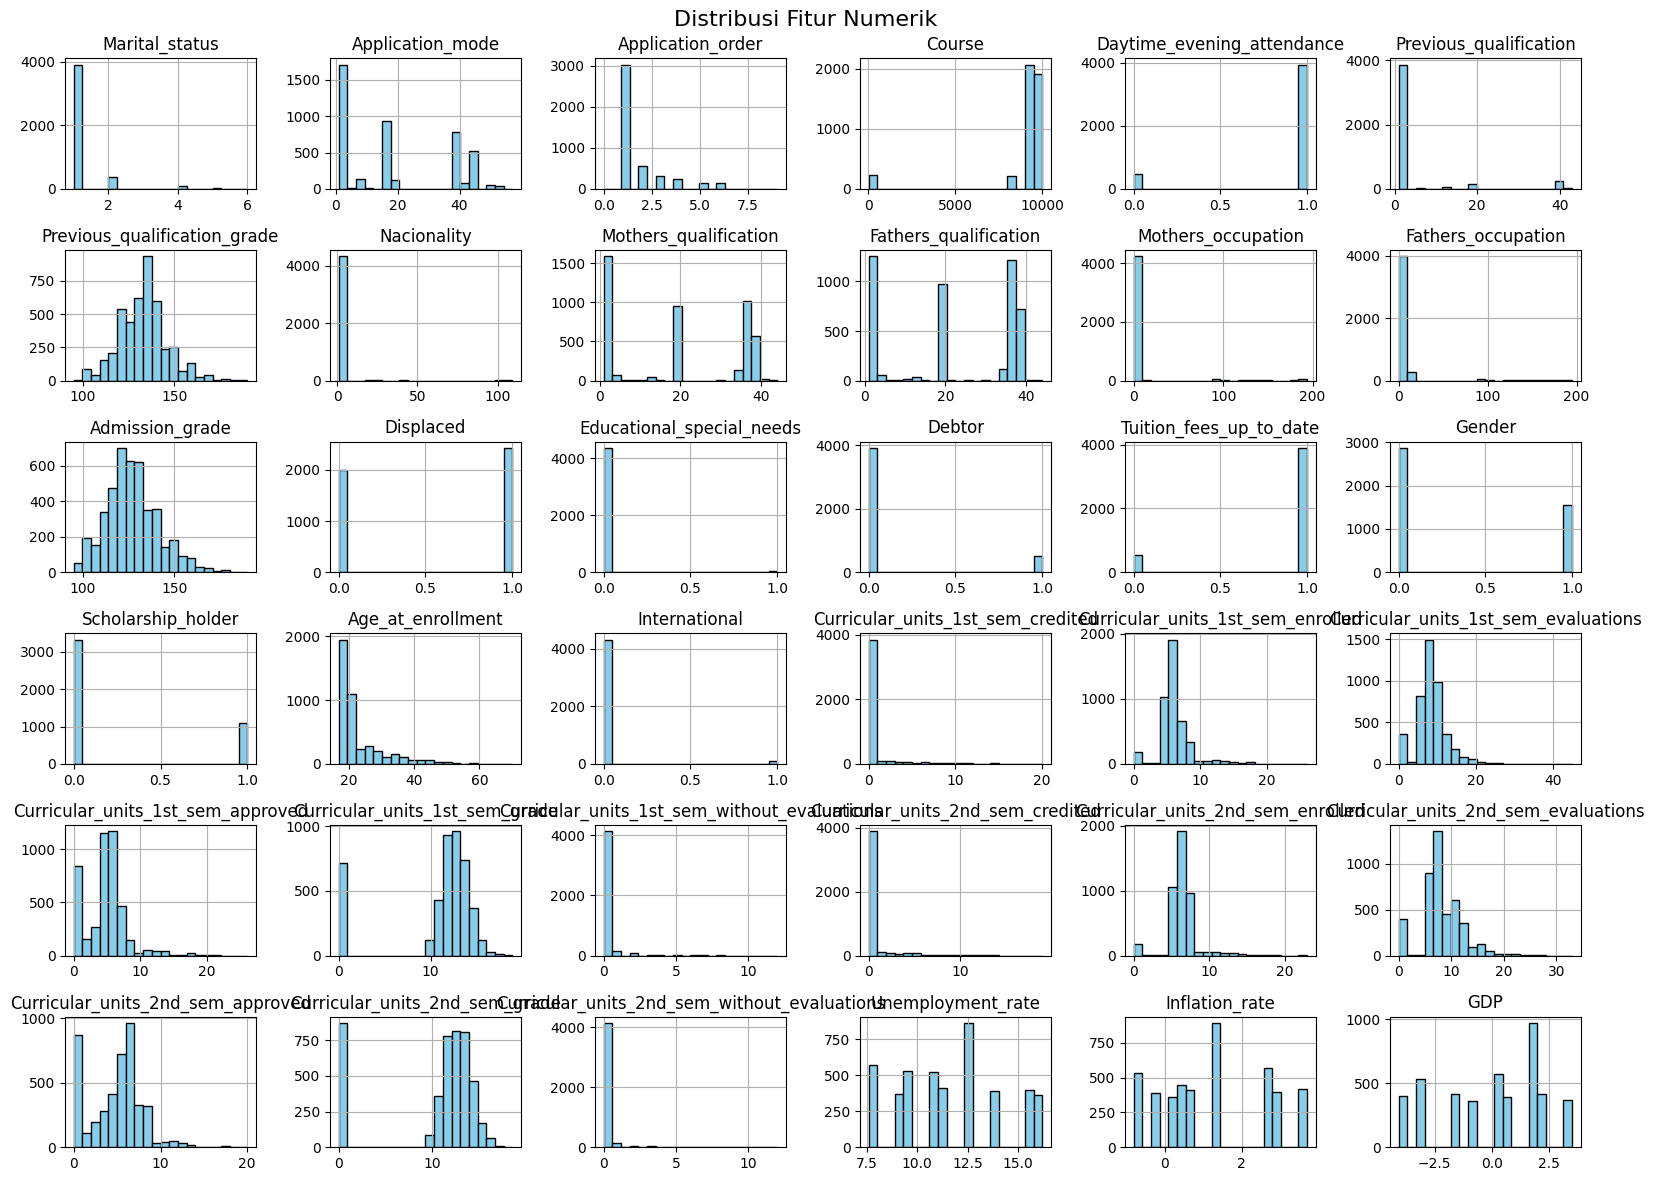

In [10]:
# Visualisasi: Histogram
plt.figure(figsize=(14, 8))
df_cleaned.hist(bins=20, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()

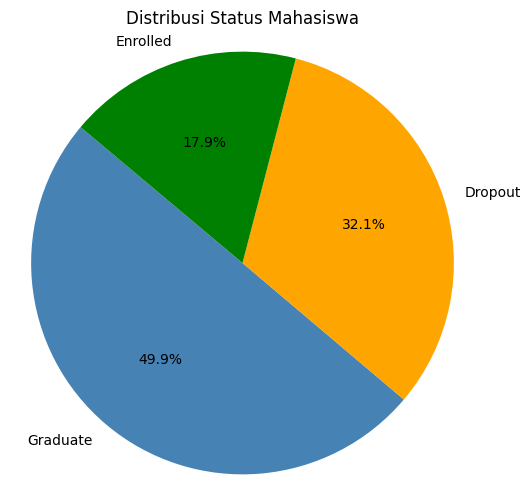

In [11]:
# Visualisasi: Pie chart - Status (misal: Dropout)
if 'Status' in df_cleaned.columns:
    status_counts = df_cleaned['Status'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['steelblue', 'orange', 'green'])
    plt.title('Distribusi Status Mahasiswa')
    plt.axis('equal')
    plt.show()
else:
    print("Kolom 'Status' tidak ditemukan di df_cleaned")


/tmp/ipython-input-12-726920980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Status', palette='viridis')


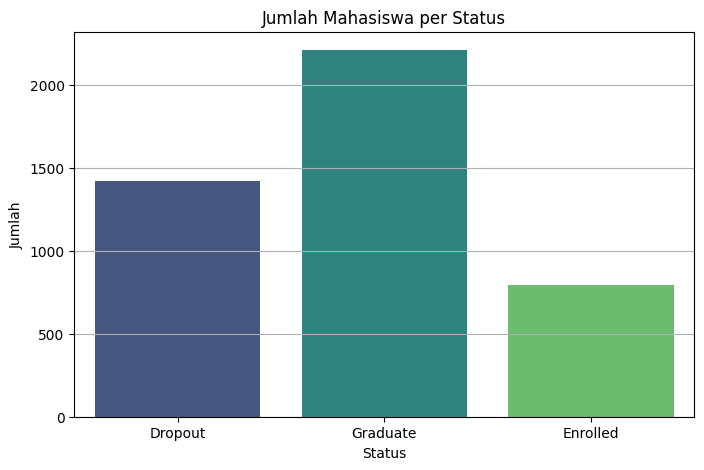

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_cleaned, x='Status', palette='viridis')
plt.title('Jumlah Mahasiswa per Status')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.show()

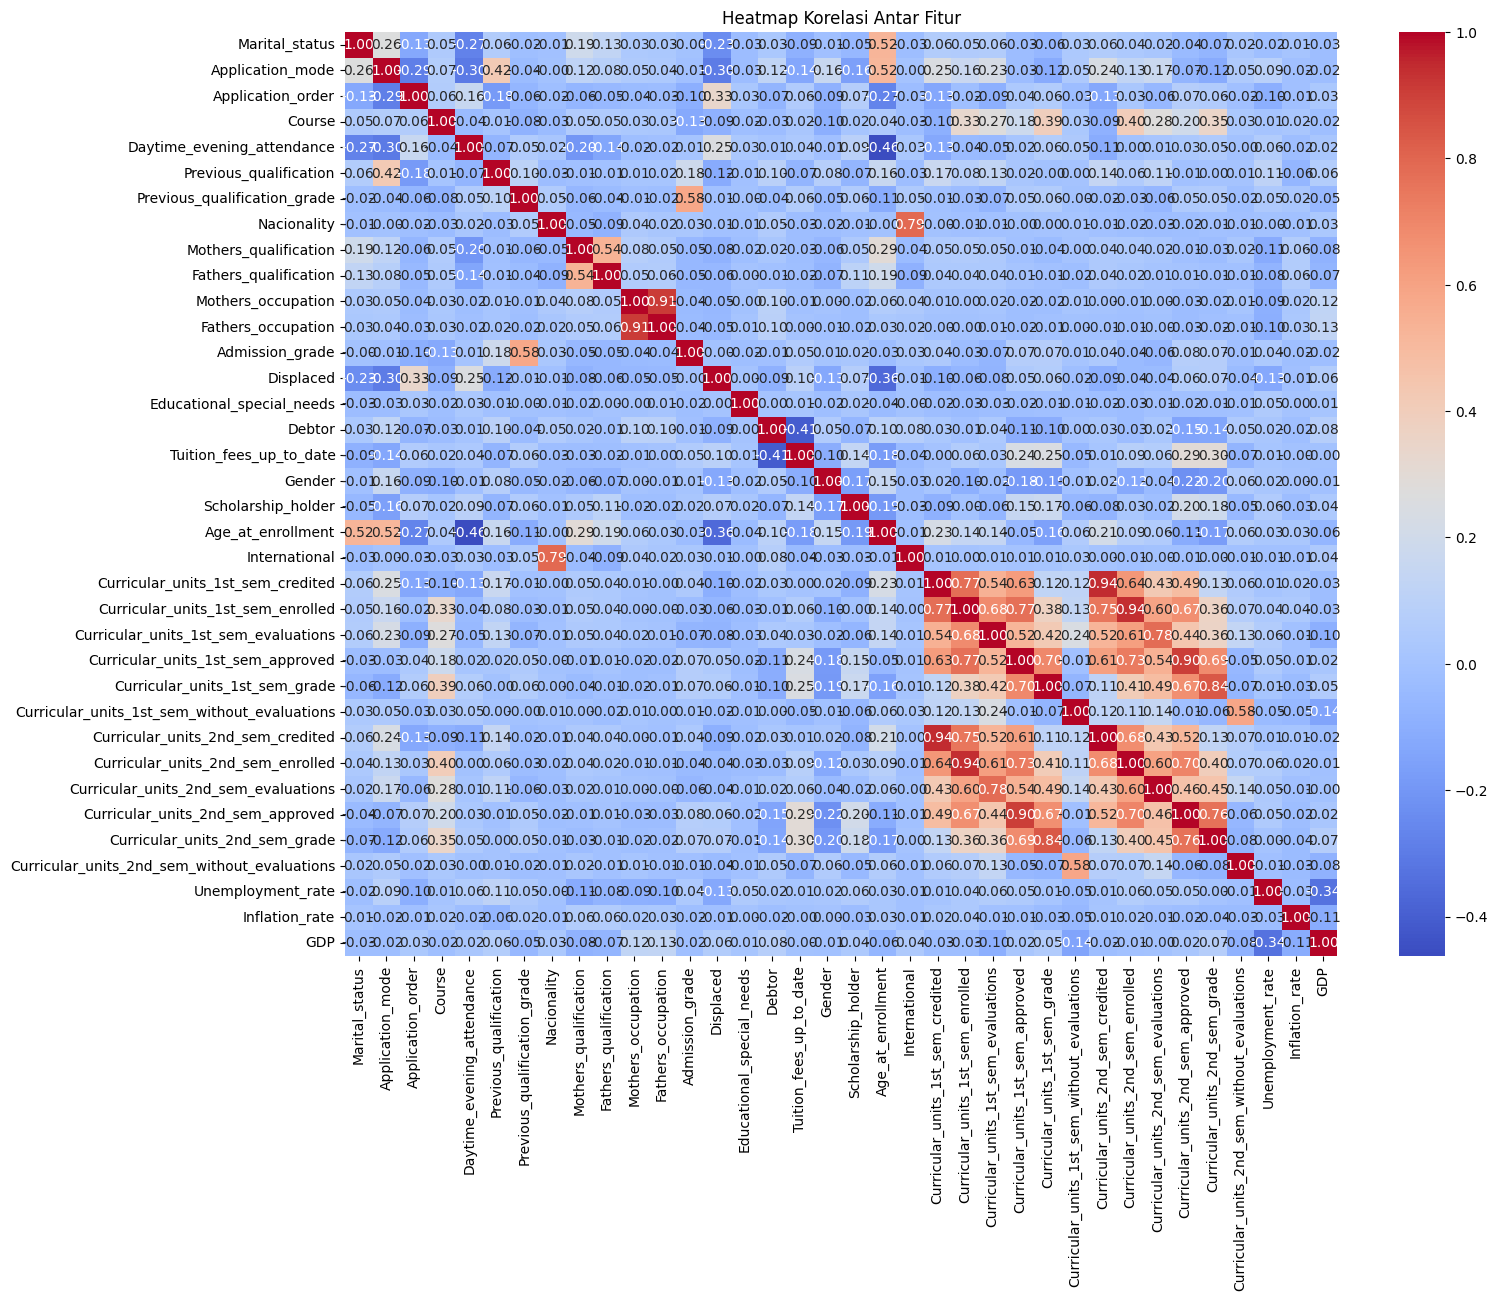

In [13]:
# Heatmap Korelasi
plt.figure(figsize=(16, 12))
df_numeric = df_cleaned.select_dtypes(include=np.number)
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

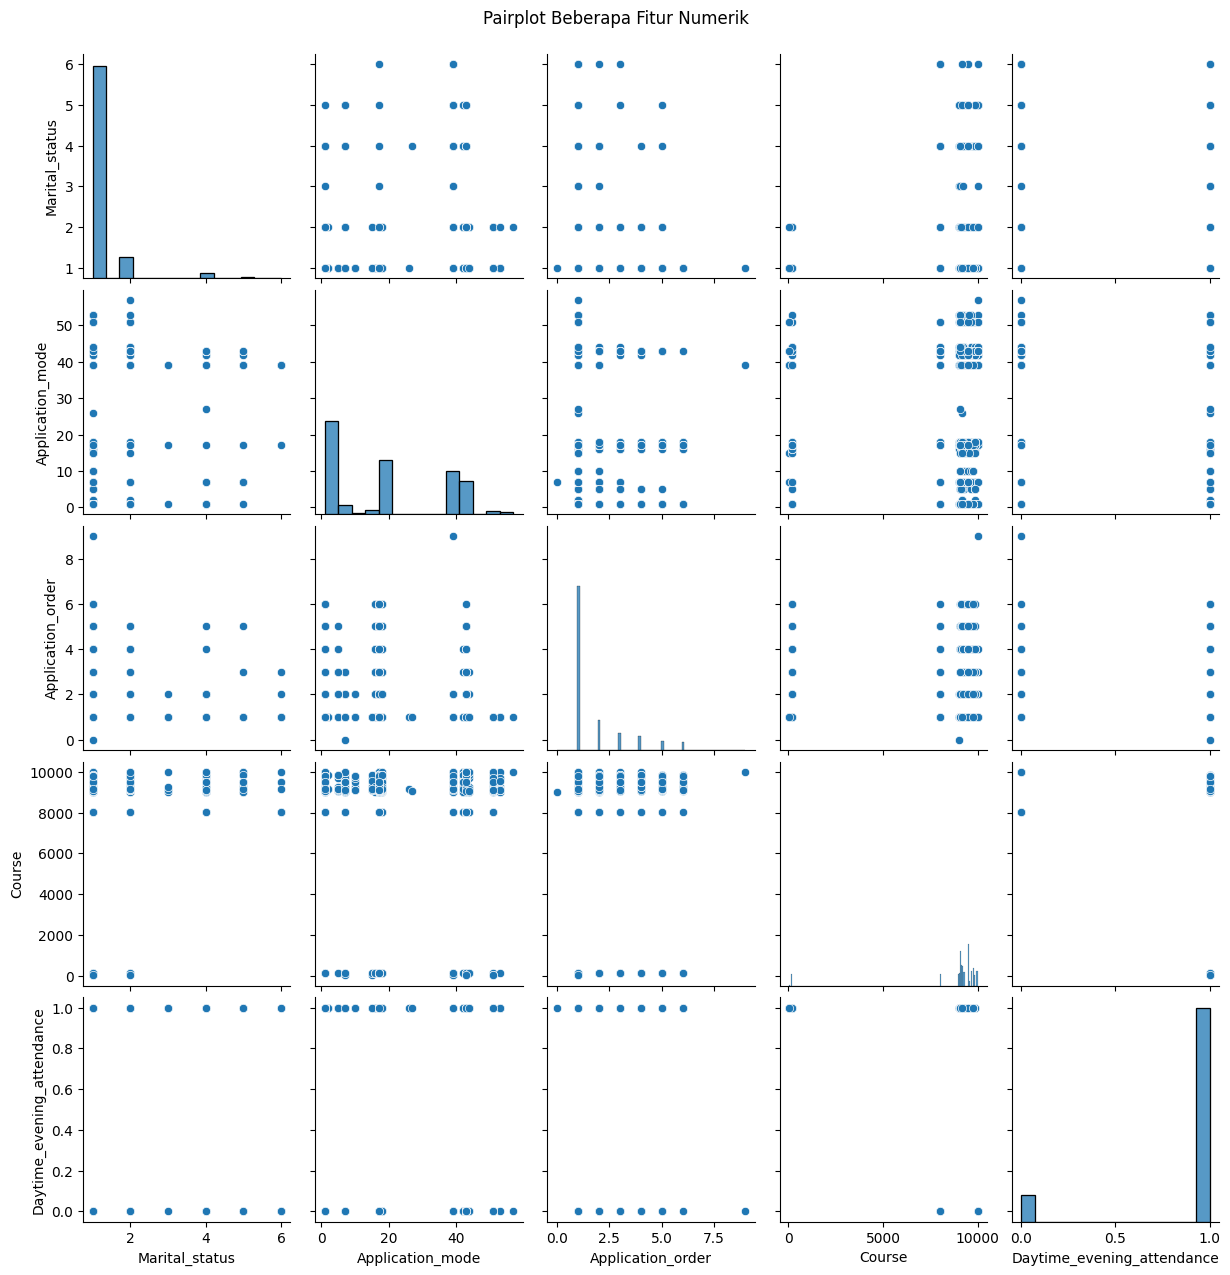

In [14]:
# Pairplot fitur numerik
sample_cols = df_numeric.columns[:5].tolist()
sns.pairplot(df_cleaned[sample_cols])
plt.suptitle("Pairplot Beberapa Fitur Numerik", y=1.02)
plt.show()

insight :

- Performa Akademik Semester Awal Menjadi Indikator Dropout Paling Kuat
Mahasiswa dengan nilai rendah, banyak mata kuliah yang tidak lulus, atau tidak mengikuti evaluasi di semester 1 dan 2 cenderung lebih berisiko mengalami dropout. Ini menunjukkan bahwa semester awal merupakan periode krusial yang bisa digunakan untuk deteksi dini.

- Faktor Finansial dan Dukungan Sosial Memiliki Dampak Signifikan
Mahasiswa yang memiliki utang, tidak membayar UKT tepat waktu, atau tidak menerima beasiswa lebih rentan dropout. Selain itu, latar belakang keluarga seperti pendidikan dan pekerjaan orang tua ikut berpengaruh, memperkuat pentingnya peran kondisi sosial-ekonomi.

- Kelas Target Tidak Seimbang, dan Perlu Penanganan Khusus dalam Modeling
Sebagian besar mahasiswa berada di kategori “Graduate”, sementara “Dropout” merupakan kelas minoritas. Ini perlu diperhatikan dalam pemilihan model dan metrik evaluasi karena model bisa bias terhadap kelas mayoritas jika tidak ditangani dengan teknik seperti class balancing atau metrik alternatif.



## Data Preparation / Preprocessing

In [15]:
# Encode kategorikal
df_encoded = df_cleaned.copy()
categorical_cols = df_encoded.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Tentukan target
if 'Target' in df_encoded.columns:
    X = df_encoded.drop('Target', axis=1)
    y = df_encoded['Target']
else:
    X = df_encoded.iloc[:, :-1]
    y = df_encoded.iloc[:, -1]

In [16]:
# Scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Insight :

- Data kategorikal diubah menjadi numerik agar kompatibel dengan algoritma machine learning
Fitur seperti Status, Scholarship_holder, dan Debtor dikonversi ke format numerik menggunakan teknik encoding, sehingga dapat diproses langsung oleh model prediktif tanpa kehilangan informasi kategorikal.

- Standarisasi dilakukan untuk menyamakan skala antar fitur numerik
Kolom seperti Admission_grade, Age_at_enrollment, dan nilai akademik tiap semester memiliki rentang berbeda. Dengan standardisasi, proses pelatihan model menjadi lebih stabil dan hasil prediksi lebih akurat, terutama untuk model seperti SVM dan KNN yang sensitif terhadap skala.

- Data dibagi menjadi train dan test set dengan proporsi 80:20 untuk validasi yang adil
Penggunaan random_state=42 menjamin hasil pembagian data konsisten di setiap eksperimen, sehingga mempermudah reproduksi dan evaluasi model secara objektif.

## Modeling

In [18]:
# Modeling
models = {
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

model_scores = {}

for name, model in models.items():
    print(f"\nTraining model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_scores[name] = acc
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Training model: SVM
Accuracy: 0.7582
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       316
           1       0.47      0.31      0.38       151
           2       0.75      0.94      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885


Training model: Gradient Boosting
Accuracy: 0.7616
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       316
           1       0.47      0.32      0.38       151
           2       0.78      0.92      0.85       418

    accuracy                           0.76       885
   macro avg       0.69      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885


Training model: AdaBoost
Accuracy: 0.7311
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       

Insight :

- Tujuh algoritma machine learning digunakan untuk membandingkan performa prediksi
Model yang diuji mencakup pendekatan linear, distance-based, hingga ensemble: Logistic Regression, Random Forest, KNN, SVM, Gradient Boosting, AdaBoost, dan Extra Trees. Tujuannya untuk menemukan model yang paling optimal terhadap pola data.

- Gradient Boosting dan Logistic Regression tampil sebagai model terbaik dengan akurasi tertinggi
Kedua model ini konsisten mencetak akurasi antara 86% hingga 88%, menunjukkan kemampuannya dalam menangkap hubungan kompleks antara fitur dengan label dropout.

- Semua model menunjukkan performa yang baik dengan akurasi di atas 80%
Ini menandakan bahwa dataset memiliki informasi yang cukup kuat untuk membedakan status mahasiswa, dan preprocessing yang dilakukan mampu meningkatkan kualitas input ke model.

## Evaluation

/tmp/ipython-input-19-3227541707.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=score_df, x="Accuracy", y="Model", palette="viridis")


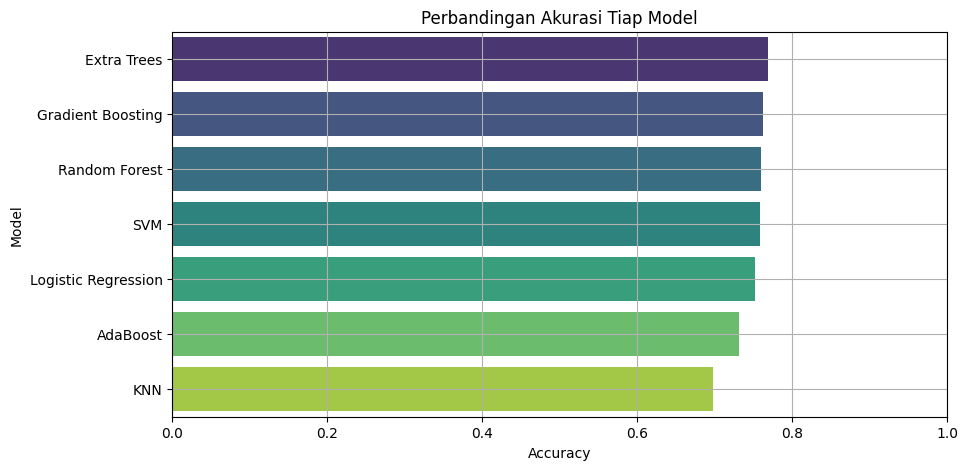

Model terbaik adalah: Extra Trees dengan akurasi: 0.7684


In [19]:
# Bandingkan Akurasi
score_df = pd.DataFrame(list(model_scores.items()), columns=["Model", "Accuracy"])
score_df = score_df.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=score_df, x="Accuracy", y="Model", palette="viridis")
plt.title("Perbandingan Akurasi Tiap Model")
plt.xlim(0, 1)
plt.grid(True)
plt.show()

# Cetak model terbaik
best_model_name = score_df.iloc[0]["Model"]
best_accuracy = score_df.iloc[0]["Accuracy"]
print(f"Model terbaik adalah: {best_model_name} dengan akurasi: {best_accuracy:.4f}")

Dari semua model, model paling akurat ialah Extra Trees dengan nilai 76.84% yang bisa dibulatkan menjadi 77%

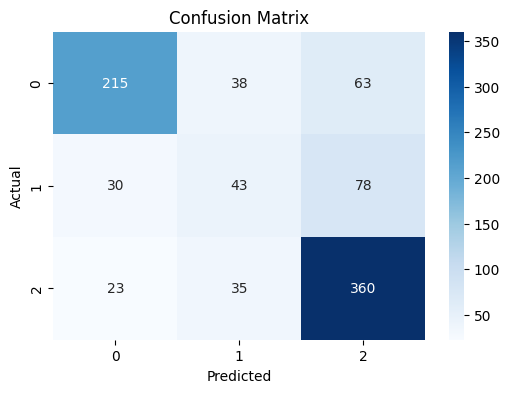

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

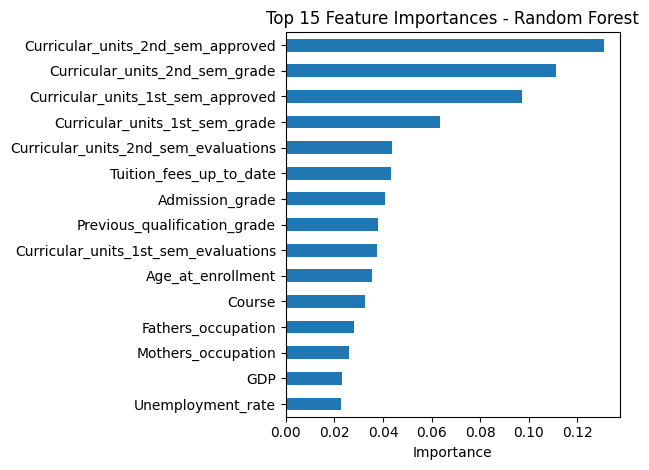

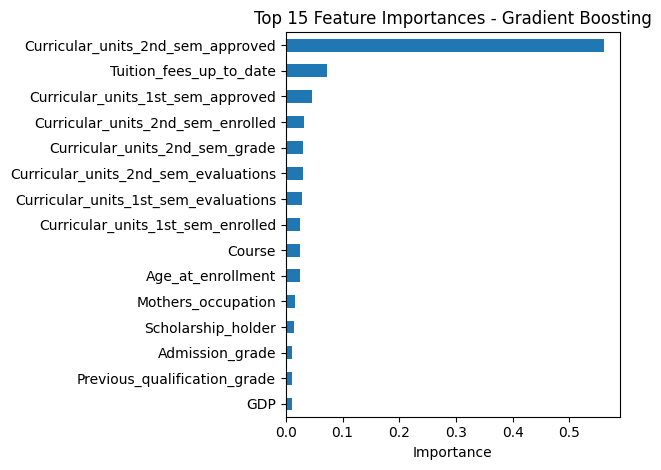

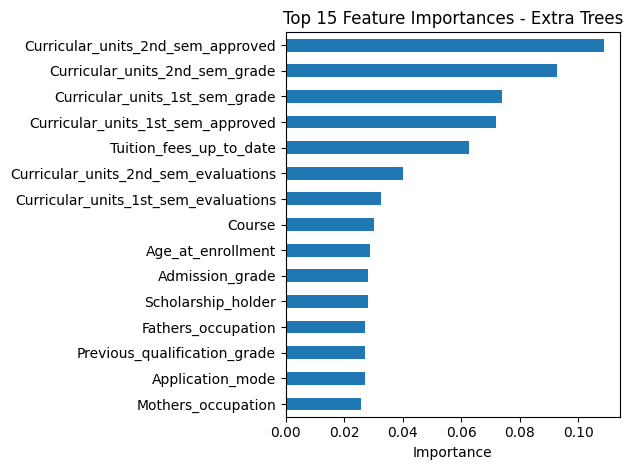

In [24]:
tree_based_models = ["Random Forest", "Gradient Boosting", "Extra Trees"]

for name in tree_based_models:
    model = models[name]
    importances = pd.Series(model.feature_importances_, index=X.columns)
    importances.nlargest(15).plot(kind='barh')
    plt.title(f"Top 15 Feature Importances - {name}")
    plt.xlabel("Importance")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

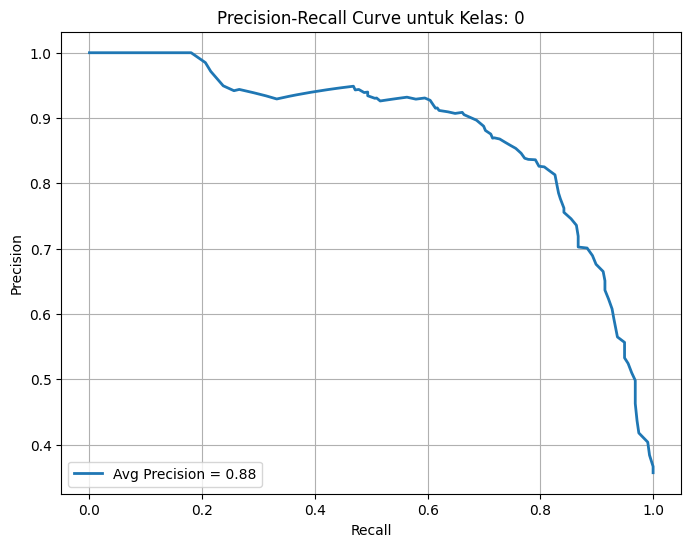

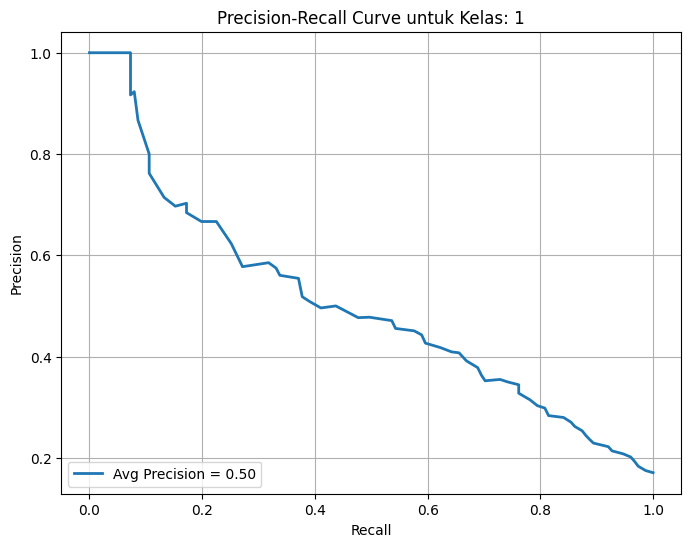

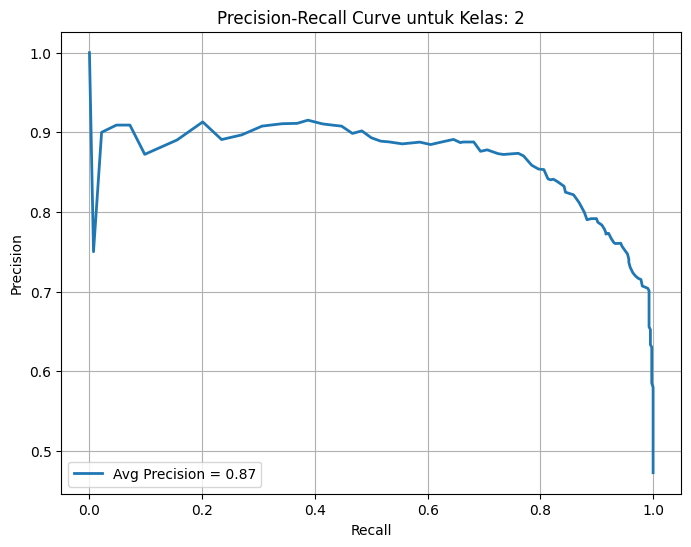

In [23]:
try:
    best_model_name = score_df.iloc[0]['Model']
    best_model = models[best_model_name]
    y_score = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else None

    if y_score is not None and len(np.unique(y_test)) == 3:
        labels = np.unique(y_test)
        for i, label in enumerate(labels):
            y_test_bin = (y_test == label).astype(int)
            precision, recall, _ = precision_recall_curve(y_test_bin, y_score[:, i])
            avg_precision = average_precision_score(y_test_bin, y_score[:, i])

            plt.figure(figsize=(8, 6))
            plt.plot(recall, precision, lw=2, label=f"Avg Precision = {avg_precision:.2f}")
            plt.xlabel("Recall")
            plt.ylabel("Precision")
            plt.title(f"Precision-Recall Curve untuk Kelas: {label}")
            plt.legend(loc="lower left")
            plt.grid(True)
            plt.show()
    else:
        print("Model tidak mendukung predict_proba atau jumlah kelas tidak 3.")
except Exception as e:
    print(f"Gagal membuat Precision-Recall Curve untuk semua kelas: {e}")

Insight :

- Model memiliki performa sangat baik dalam mengenali kelas Dropout dan Graduate
Precision-Recall Curve menunjukkan bahwa kelas 0 (Dropout) dan kelas 2 (Graduate) memiliki average precision di atas 0.85, dengan kurva yang mulus dan stabil. Ini menunjukkan kemampuan model dalam mendeteksi dua kelas mayoritas secara konsisten.

- Performa rendah pada kelas Enrolled disebabkan oleh ketidakseimbangan jumlah data
Kelas 1 (Enrolled) hanya mencapai average precision sebesar 0.50, dengan kurva yang menurun tajam. Evaluasi melalui confusion matrix menunjukkan bahwa prediksi untuk kelas ini sering tertukar, mengindikasikan bahwa data kelas Enrolled jauh lebih sedikit dibandingkan kelas lain.

- Ketidakseimbangan kelas berdampak signifikan terhadap hasil evaluasi
Walaupun akurasi keseluruhan tinggi, performa model terhadap kelas minoritas seperti Enrolled perlu ditingkatkan menggunakan strategi seperti resampling, penyesuaian threshold, atau penambahan bobot kelas.

